In [24]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [25]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

In [26]:
train_file = "Downloads\\train.csv"
test_file = "Downloads\\test.csv"
output_file = "Downloads\\submission.csv"

In [53]:
# Load the data

raw_data = np.loadtxt(train_file, skiprows=1, dtype='int', delimiter=',')
x_train, x_val, y_train, y_val = train_test_split(
    raw_data[:,1:], raw_data[:,0], test_size=0.1)

Text(0.5, 1.0, '28x28 data')

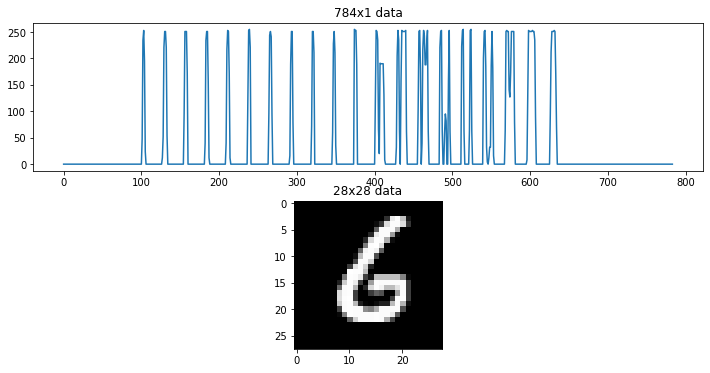

In [28]:
fig, ax = plt.subplots(2, 1, figsize=(12,6))
ax[0].plot(x_train[0])
ax[0].set_title('784x1 data')
ax[1].imshow(x_train[0].reshape(28,28), cmap='gray')
ax[1].set_title('28x28 data')

In [29]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)

In [30]:
x_train = x_train.astype("float32")/255.
x_val = x_val.astype("float32")/255.

In [31]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
#example:
print(y_train[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [32]:
# Train the model

model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu',
                 input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
#model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
#model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))









Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [33]:
# Keras function for augmentation.

datagen = ImageDataGenerator(zoom_range = 0.1,
                            height_shift_range = 0.1,
                            width_shift_range = 0.1,
                            rotation_range = 10)

In [34]:
# Using optimizer Adam 

model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=1e-4), metrics=["accuracy"])

In [35]:
# We train once with a smaller learning rate to ensure convergence. 
# We then speed things up, only to reduce the learning rate by 10% every epoch. Keras has a function for this:

annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [36]:
# very small validation set during training to save time in the kernel.

hist = model.fit_generator(datagen.flow(x_train, y_train, batch_size=16),
                           steps_per_epoch=500,
                           epochs=20, #Increase this when not on Kaggle kernel
                           verbose=2,  #1 for ETA, 0 for silent
                           validation_data=(x_val[:400,:], y_val[:400,:]), #For speed
                           callbacks=[annealer])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20
 - 34s - loss: 0.7860 - acc: 0.7487 - val_loss: 0.1459 - val_acc: 0.9500
Epoch 2/20
 - 31s - loss: 0.3206 - acc: 0.9058 - val_loss: 0.0408 - val_acc: 0.9825
Epoch 3/20
 - 25s - loss: 0.2348 - acc: 0.9304 - val_loss: 0.0622 - val_acc: 0.9850
Epoch 4/20
 - 24s - loss: 0.1858 - acc: 0.9429 - val_loss: 0.0590 - val_acc: 0.9800
Epoch 5/20
 - 26s - loss: 0.1649 - acc: 0.9539 - val_loss: 0.0210 - val_acc: 0.9950
Epoch 6/20
 - 25s - loss: 0.1566 - acc: 0.9546 - val_loss: 0.0251 - val_acc: 0.9900
Epoch 7/20
 - 26s - loss: 0.1514 - acc: 0.9577 - val_loss: 0.0341 - val_acc: 0.9925
Epoch 8/20
 - 27s - loss: 0.1287 - acc: 0.9624 - val_loss: 0.0174 - val_acc: 0.9925
Epoch 9/20
 - 28s - loss: 0.1182 - acc: 0.9663 - val_loss: 0.0096 - val_acc: 1.0000
Epoch 10/20
 - 25s - loss: 0.1051 - acc: 0.9697 - val_loss: 0.0106 - val_acc: 0.9950
Epoch 11/20
 - 27s - loss: 0.0911 - acc: 0.9740 - val_loss: 0.0

In [37]:
# let's check performance on the whole validation set.

final_loss, final_acc = model.evaluate(x_val, y_val, verbose=0)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

Final loss: 0.0199, final accuracy: 0.9929


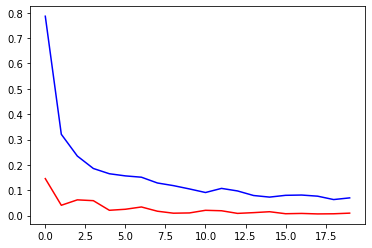

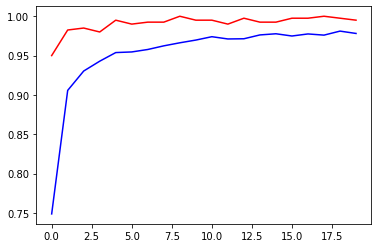

In [38]:
plt.plot(hist.history['loss'], color='b')
plt.plot(hist.history['val_loss'], color='r')
plt.show()
plt.plot(hist.history['acc'], color='b')
plt.plot(hist.history['val_acc'], color='r')
plt.show()

In [44]:
y_hat = model.predict(x_val)
y_pred = np.argmax(y_hat, axis=1)
y_true = np.argmax(y_val, axis=1)
cm = confusion_matrix(y_true, y_pred)

print(cm)

[[384   0   0   0   0   0   0   0   0   0]
 [  0 481   0   0   0   0   1   1   0   0]
 [  1   2 430   1   0   0   0   1   0   0]
 [  0   0   0 424   0   0   0   0   1   0]
 [  0   1   0   0 388   0   1   0   0   4]
 [  0   0   0   2   0 393   0   0   1   0]
 [  2   0   0   0   1   0 412   0   0   0]
 [  0   0   0   0   0   0   0 435   0   0]
 [  0   0   0   0   0   1   1   0 426   1]
 [  1   0   0   0   3   2   0   1   0 397]]


In [48]:
mnist_testset = np.loadtxt(test_file, skiprows=1, dtype='int', delimiter=',')
x_test = mnist_testset.astype("float32")
x_test = x_test.reshape(-1, 28, 28, 1)/255.


In [49]:
y_hat = model.predict(x_test, batch_size=64)

In [50]:
y_pred = np.argmax(y_hat,axis=1)

In [51]:
with open(output_file, 'w') as f :
    f.write('ImageId,Label\n')
    for i in range(len(y_pred)) :
        f.write("".join([str(i+1),',',str(y_pred[i]),'\n']))